In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

## (a) distance of location table

In [2]:
# Incheon, Seoul, Busan, Daegu, Daejeon, Gwangju, Suwon-si, Ulsan, Jeonju, Cheongju-si, Changwon, Jeju-si, Chuncheon, Hongsung, Muan
distance_mat =  [[0, 27, 335, 244, 141, 257, 33, 316, 186, 115, 304, 439, 102, 95, 275],
          [27, 0, 330, 237, 144, 268, 31, 307, 195, 113, 301, 453, 75, 111, 290],
          [335, 330, 0, 95, 199, 193, 304, 54, 189, 221, 35, 291, 330, 271, 233],
          [244, 237, 95, 0, 117, 171, 212, 75, 130, 130, 72, 324, 236, 191, 215],
          [141, 144, 199, 117, 0, 137, 114, 192, 61, 36, 167, 323, 175, 74, 171],
          [257, 268, 193, 171, 137, 0, 238, 222, 77, 173, 161, 186, 311, 162, 44],
          [33, 31, 304, 212, 114, 238, 0, 284, 164, 84, 274, 423, 91, 83, 260],
          [316, 307, 54, 75, 192, 222, 284, 0, 198, 205, 67, 341, 296, 266, 265],
          [186, 195, 189, 130, 61, 77, 164, 198, 0, 96, 154, 263, 234, 97, 111],
          [115, 113, 221, 130, 36, 173, 84, 205, 96, 0, 190, 359, 139, 74, 205],
          [304, 301, 35, 72, 167, 161, 274, 67, 154, 190, 0, 275, 306, 237, 202],
          [439, 453, 291, 324, 323, 186, 423, 341, 263, 359, 275, 0, 498, 344, 165],
          [102, 75, 330, 236, 175, 311, 91, 296, 234, 139, 306, 498, 0, 170, 340],
          [95, 111, 271, 191, 74, 162, 83, 266, 97, 74, 237, 344, 170, 0, 180],
          [275, 290, 233, 215, 171, 44, 260, 265, 111, 205, 202, 165, 340, 180, 0]]


## (c)  random walk

In [3]:
def randomWalk(iter=100): 
  city_num = 15
  best_tour = []
  best_dist = 0

  def single_swap(sub_tour):
    temtour = sub_tour.copy()
    ran = random.sample(range(1, city_num), k=2)
    temtour[ran[0]], temtour[ran[1]] = temtour[ran[1]], temtour[ran[0]]
    return temtour

  def randomSolution():
    cities = list(range(1, city_num))
    random.shuffle(cities)
    cities.insert(0, 0)
    cities.append(0)
    return cities

  def routeLength(sub_tour):
    routeLength = 0
    for i in range(len(sub_tour) - 1):
        routeLength += distance_mat[sub_tour[i]][sub_tour[i + 1]]
    return routeLength

  sub_tour = randomSolution()
  best_tour = sub_tour.copy()
  best_dist = routeLength(best_tour)

  for i in range(iter):
    new_tour = single_swap(sub_tour)
    if routeLength(new_tour) < best_dist:
      best_tour = new_tour
      best_dist = routeLength(new_tour)
    sub_tour = new_tour

  return best_tour, best_dist

best_tour, best_dist = randomWalk(iter=100)
print(best_tour)
print(best_dist)

[0, 8, 1, 12, 9, 11, 14, 5, 10, 2, 13, 4, 7, 3, 6, 0]
2216


## (d) Hill climbing

In [4]:
def hillClimbing(iter=100): 
  city_num = 15
  best_tour = []
  best_dist = 0

  def single_swap(sub_tour):
    temtour = sub_tour.copy()
    ran = random.sample(range(1, city_num), k=2)
    temtour[ran[0]], temtour[ran[1]] = temtour[ran[1]], temtour[ran[0]]
    return temtour

  def randomSolution():
    cities = list(range(1, city_num))
    random.shuffle(cities)
    cities.insert(0, 0)
    cities.append(0)
    return cities

  def routeLength(sub_tour):
    routeLength = 0
    for i in range(len(sub_tour) - 1):
        routeLength += distance_mat[sub_tour[i]][sub_tour[i + 1]]
    return routeLength

  sub_tour = randomSolution()
  best_tour = sub_tour.copy()
  best_dist = routeLength(best_tour)

  for i in range(iter):
    new_tour = single_swap(sub_tour)
    if routeLength(new_tour) < best_dist:
      best_tour = new_tour
      best_dist = routeLength(new_tour)
      sub_tour = new_tour

  return best_tour, best_dist

best_tour, best_dist = hillClimbing(iter=100)
print(best_tour)
print(best_dist)

[0, 1, 12, 4, 13, 11, 7, 2, 10, 3, 9, 8, 14, 5, 6, 0]
1849


## (e) Tabu search

In [5]:
def tabuSearch(iter=100):  
  city_num = 15
  best_tour = []
  best_dist = 0
  tabu_list = []
  tabu_tenure = 10

  def single_swap(sub_tour):
    temtour = sub_tour.copy()
    ran = random.sample(range(1, city_num), k=2)
    move = (ran[0], ran[1]) if ran[0] < ran[1] else (ran[1], ran[0])
    temtour[ran[0]], temtour[ran[1]] = temtour[ran[1]], temtour[ran[0]]
    return temtour, move

  def randomSolution():
    cities = list(range(1, city_num))
    random.shuffle(cities)
    cities.insert(0, 0)
    cities.append(0)
    return cities

  def routeLength(sub_tour):
    routeLength = 0
    for i in range(len(sub_tour) - 1):
        routeLength += distance_mat[sub_tour[i]][sub_tour[i + 1]]
    return routeLength

  cur_tour = randomSolution()
  cur_dist = routeLength(cur_tour)
  best_tour = cur_tour.copy()
  best_dist = cur_dist

  for _ in range(iter):
    new_tour = []
    new_dist = -1
    for i in range(1, city_num):
      for j in range(i + 1, city_num):
        test_tour, move = single_swap(cur_tour)
        test_dist = routeLength(test_tour)
        cond = ((move in tabu_list) and ((test_dist < new_dist) or (new_dist == -1))) or (test_dist < best_dist)
        if cond:
          new_tour = test_tour
          new_dist = test_dist
          moveb = move
    cur_tour = new_tour
    cur_dist = new_dist
    if cur_tour:
      if cur_dist < best_dist:
        best_tour = cur_tour
        best_dist = cur_dist
      tabu_list.append(tuple(reversed(moveb)))
      if len(tabu_list) > tabu_tenure:
        del tabu_list[0]

    if not cur_tour:
      break
  return best_tour, best_dist

best_tour, best_dist = tabuSearch(iter=100)
print(best_tour)
print(best_dist)

[0, 12, 1, 6, 13, 9, 4, 10, 2, 7, 3, 11, 14, 5, 8, 0]
1528


## (f) Simulated Annealing

In [ ]:
def SA(iter=400):  
  city_num = 15  	
  K  = 1.0  # Boltzmann rate
  T_start = 400	# initial temperate

  def single_swap(sub_tour):
    temtour = sub_tour.copy()
    ran = random.sample(range(1, city_num), k=2)
    temtour[ran[0]], temtour[ran[1]] = temtour[ran[1]], temtour[ran[0]]
    return temtour

  def randomSolution():
    cities = list(range(1, city_num))
    random.shuffle(cities)
    cities.insert(0, 0)
    cities.append(0)
    return cities

  def routeLength(sub_tour):
    routeLength = 0
    for i in range(len(sub_tour) - 1):
        routeLength += distance_mat[sub_tour[i]][sub_tour[i + 1]]
    return routeLength

  def getTemp(t):
    return (1 - t/iter) * T_start

  cur_tour = randomSolution()
  cur_dist = routeLength(cur_tour)
  best_tour = cur_tour.copy()             
  best_dist = cur_dist

  t = 0;
  while t < iter:
    new_tour = single_swap(cur_tour)
    new_dist = routeLength(new_tour)

    if new_dist < cur_dist:			# keep new_tour if energy is reduced
      cur_tour = new_tour
      cur_dist = new_dist
      if cur_dist < best_dist:	
          best_tour = cur_tour.copy()
          best_dist = cur_dist
    else:
        if random.uniform(0.0, 1.0) < math.exp( - (new_dist - cur_dist) / (K * getTemp(t)) ):
            cur_tour = new_tour.copy()
            cur_dist = new_dist

    t += 1
  return best_tour, best_dist

best_tour, best_dist = SA(iter=400)
print(best_tour)
print(best_dist)

[0, 13, 8, 4, 3, 7, 10, 2, 5, 11, 14, 9, 6, 12, 1, 0]
1573


## (g) Ant Colony

In [ ]:
def antColony(iter=200):  
  city_num = 15
  ant_num = 30
  decay_rate = 0.8
  scaling = 2

  pheromone_mat = np.full((city_num, city_num), 1, dtype=np.float64)

  def routeLength(sub_tour):
    routeLength = 0
    for i in range(len(sub_tour) - 1):
        routeLength += distance_mat[sub_tour[i]][sub_tour[i + 1]]
    return routeLength

  def next_step(ant):
    start = ant[-1]
    candidate = []
    for i in range(1, city_num):
      if not i in ant:
        candidate.append(i)
    weights = []  
    for item in candidate:
      weights.append(pheromone_mat[start][item])
    [next] = random.choices(candidate, weights=weights)
    return next

  for _ in range(iter):
    ants = np.full((ant_num, 1), [0], dtype=int)
    ants = ants.tolist()
    for i in range(ant_num):
      for _ in range(city_num - 1):
        ants[i].append(next_step(ants[i]))
      ants[i].append(0)
    ants_dist = [routeLength(route) for route in ants]
    best_dist = min(ants_dist)
    worse_dist = max(ants_dist)
    best_ants = []
    for i in range(len(ants_dist)):
      if ants_dist[i] == best_dist:
        best_ants.append(ants[i])

    # pheromone decay
    pheromone_mat *= decay_rate
    delta = scaling * best_dist / worse_dist
    for best in best_ants:
      for i in range(len(best) - 1):
        pheromone_mat[best[i]][best[i+1]] += delta
        pheromone_mat[best[i+1]][best[i]] += delta
  return best_ants[0], best_dist

best_tour, best_dist = antColony(iter=200)
print(best_tour)
print(best_dist)

[0, 1, 12, 9, 4, 8, 3, 2, 7, 10, 5, 11, 14, 13, 6, 0]
1492


## (h) plotting the results

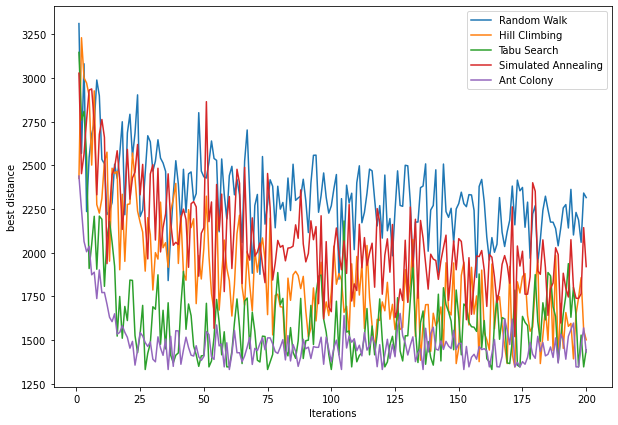

In [ ]:
iteration = list(range(1, 201))
randomWalk_plot = []
hillClimbing_plot = []
tabu_plot = []
SA_plot = []
antColony_plot = []
for iter in iteration:
  _, best_dist = randomWalk(iter=iter)
  randomWalk_plot.append(best_dist)
  _, best_dist = hillClimbing(iter=iter)
  hillClimbing_plot.append(best_dist)
  _, best_dist = tabuSearch(iter=iter)
  tabu_plot.append(best_dist)
  _, best_dist = SA(iter=iter)
  SA_plot.append(best_dist)
  _, best_dist = antColony(iter=iter)
  antColony_plot.append(best_dist)
# plot
plt.figure(figsize=(10, 7))
plt.plot(iteration, randomWalk_plot, label='Random Walk')
plt.plot(iteration, hillClimbing_plot, label='Hill Climbing')
plt.plot(iteration, tabu_plot, label='Tabu Search')
plt.plot(iteration, SA_plot, label='Simulated Annealing')
plt.plot(iteration, antColony_plot, label='Ant Colony')
plt.legend(loc='upper right')
plt.ylabel("best distance") # y label
plt.xlabel("Iterations") # x label
   
plt.show()